In [104]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from statistics import mode


In [105]:
#Punto 1

def DFT(x, y, R=1, deltat=0, N=0)->tuple:
    x, y = np.array(x), np.array(y)
    if N==0:
        N = np.size(y)
    if deltat == 0:
        deltat = x[1]-x[0]
    fk = np.linspace(0, (R/2)*(1/(deltat)), N)
    transformada = np.zeros(N) + 0j
    for k in range(N):
        transformada[k] = (y*np.exp(-np.pi*(2j)*x*fk[k])).sum()
    return (fk, transformada)

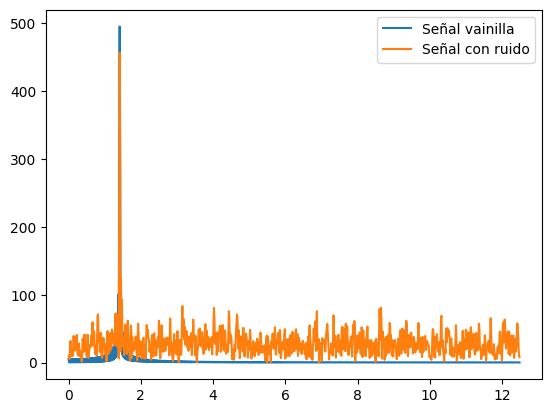

In [106]:
#Punto 2

def Signal (t):
    return np.sin(2*np.pi*np.sqrt(2)*t)

t=np.linspace(0,40,1000)
signal=Signal(t)
ruido=np.random.normal(0,1,len(signal))
signal_noise=signal+ruido

frecuencias, transformada= DFT(t,signal)
frecuencias_ruido,transformada_ruido=DFT(t,signal_noise)

plt.plot(frecuencias, np.absolute(transformada), label='Señal vainilla')
plt.plot(frecuencias_ruido,np.absolute(transformada_ruido), label='Señal con ruido')
plt.legend()
plt.show()


In [107]:
#Punto 3

indice_max=np.argmax(transformada)
max=frecuencias[indice_max]  #Este es aproximadamente la frecuencia donde se maximiza

altura_max_media=1/2*np.absolute(transformada[indice_max])
distancias_menos_un_medio=np.absolute(np.absolute(transformada)-(altura_max_media))
primer_dato=np.argmin(distancias_menos_un_medio)
segundo_dato=np.argmin(np.delete(distancias_menos_un_medio,primer_dato))
ancho=np.absolute(frecuencias[primer_dato]-frecuencias[segundo_dato])
print(max,ancho)

    


1.4000000000000001 0.07500000000000018


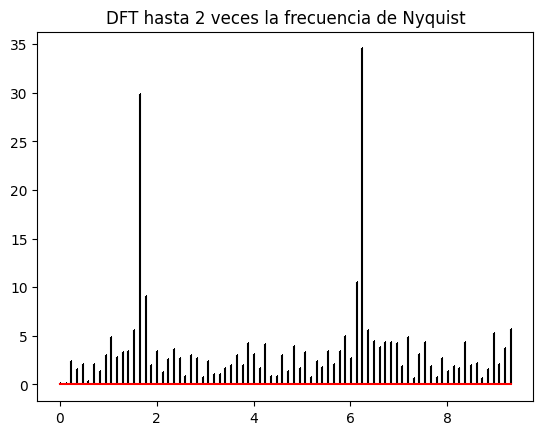

In [110]:
#Punto 4

N = 80
ts_0 = np.linspace(0,10,N)
ts = ts_0 + np.random.normal(0.,0.01,N)
f = 2*np.pi
ys = np.sin(2*np.pi*ts*f)
veces_freq = 2
deltates = np.diff(ts)
dt = mode(deltates)

frecuencias, transformada= DFT(ts,ys, R=veces_freq, deltat=dt)

plt.stem(frecuencias, np.absolute(transformada), linefmt='k-', markerfmt=',', basefmt='r-')
plt.title(f"DFT hasta {veces_freq} veces la frecuencia de Nyquist")
plt.show()


La frecuencia es 1.2565310878717617


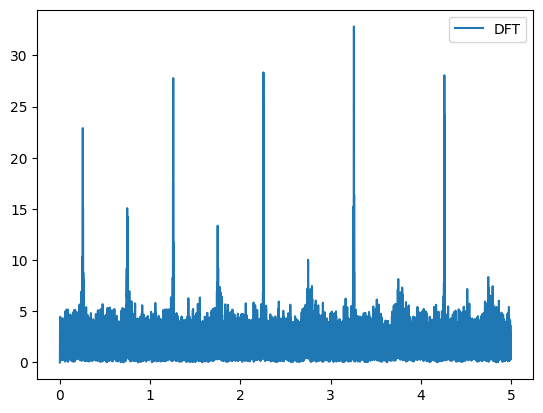

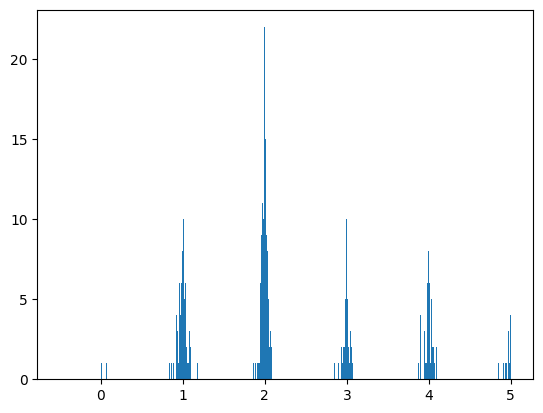

In [109]:
#Punto 5

datos_todos = "https://www.astrouw.edu.pl/ogle/ogle4/OCVS/lmc/cep/phot/I/OGLE-LMC-CEP-0001.dat"

datos = np.genfromtxt(datos_todos) 
t, y, sigma = datos[:,0], datos[:,1], datos[:,2]
nwy = y - y.mean()
deltates = np.diff(t)
dt = mode(deltates)
freq, transformada = DFT(t,nwy,20, deltat=dt, N=np.size(y)*100)

frecuencia = freq[np.argmax(transformada)]
print(f"La frecuencia es {frecuencia}")
plt.plot(freq, np.absolute(transformada), label="DFT")

plt.legend()
plt.show()
plt.hist(deltates,bins=np.linspace(-0.5,5,500))
plt.show()
